### Importing required library

In [48]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Unpickling file and Loading Data

In [49]:
import pickle

pickle_file = open("C:\\Users\\snigd\\sentiment_score_reviews_113759.data",'rb')
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df

##sentiment_score_reviews_113759.data --Dataset 1
##sentiment_score_reviews_083631.data --Dataset2

pickle_data = pickle.load(pickle_file)
df = pd.DataFrame(pickle_data)

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Normalising Sentiment score

In [52]:
conditions = [
    (df['score101'] > 0), (df['score101'] < 0), (df['score101'] ==0)]
choices = ['Positive', 'Negative', 'Neutral']
df['ForTSNEScore101'] = np.select(conditions, choices, default='NaN')

### Data cleaning to extract Reviewer State

In [53]:
df.loc[((df.forTSNECity == 'NA')), 'forTSNECity'] = 'NA,NA'

def Tsne_State(location):
    #location = 'Essen, Niedersachsen'
    locationAsList = location.split(",")
    return locationAsList[1].strip()

df['forTSNEState'] = df['forTSNECity'].apply(Tsne_State)

### Fitting Topic Proprtions in TSNE Model

In [54]:
df_1 = df[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5','topic6','topic7','topic8','topic9','topic10','topic11','topic12','topic13','topic14','topic15','topic16','topic17'#,'topic18','topic19','topic20','topic21','topic22'
            ]]

for i in range(0, 18):
    col_name = 'topic' + str(i)
    df_1[col_name] = df_1[col_name].astype(float)
    
result = df_1.to_numpy()

from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=70, learning_rate=600, n_iter=2000, verbose=1, random_state=7, angle=.5, init='pca')
# 18-D -> 2-D #22-D -> 2-D
tsne_lda = tsne_model.fit_transform(result) # result is document-topic matrix from LDA
tsne_topic_dataframe = pd.DataFrame(tsne_lda)
df_copy = df
tsne_topic_dataframe_copy = tsne_topic_dataframe.copy()

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 20997 samples in 0.102s...
[t-SNE] Computed neighbors for 20997 samples in 11.968s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20997
[t-SNE] Computed conditional probabilities for sample 2000 / 20997
[t-SNE] Computed conditional probabilities for sample 3000 / 20997
[t-SNE] Computed conditional probabilities for sample 4000 / 20997
[t-SNE] Computed conditional probabilities for sample 5000 / 20997
[t-SNE] Computed conditional probabilities for sample 6000 / 20997
[t-SNE] Computed conditional probabilities for sample 7000 / 20997
[t-SNE] Computed conditional probabilities for sample 8000 / 20997
[t-SNE] Computed conditional probabilities for sample 9000 / 20997
[t-SNE] Computed conditional probabilities for sample 10000 / 20997
[t-SNE] Computed conditional probabilities for sample 11000 / 20997
[t-SNE] Computed conditional probabilities for sample 12000 / 20997
[t-SNE] Computed conditional probabilities for s

### TSNE plotting for Metadata with Topic Proportions

In [68]:
df_copy['x_axis']=tsne_topic_dataframe_copy[0]
df_copy['y_axis']=tsne_topic_dataframe_copy[1]

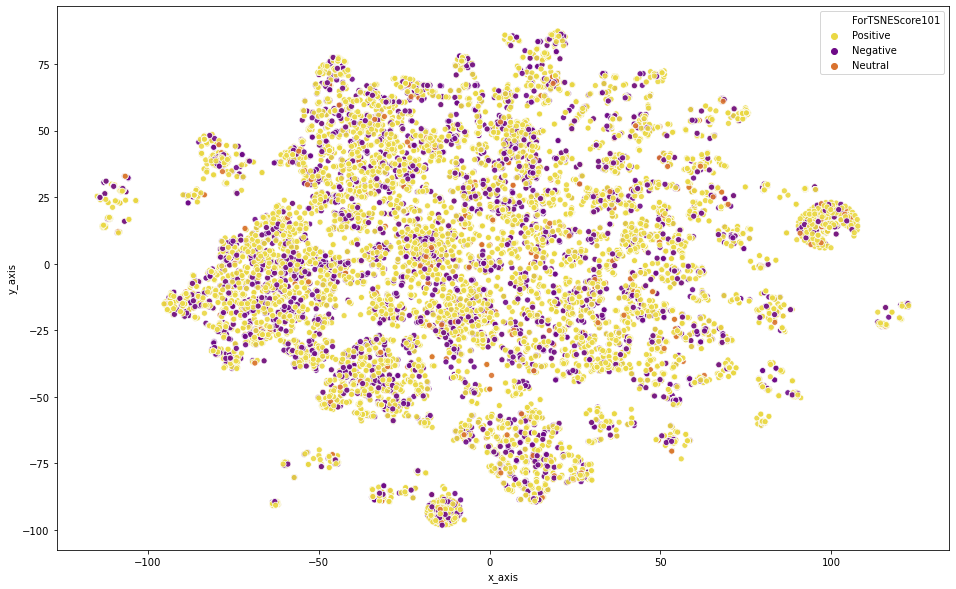

In [56]:
# reviews and ForTSNEScore101
plt.figure(figsize=(16,10))

colors = ["#ead844", "#6e0a87", "#d9722e", "#97cae4", "#b92138", "#c3c484", "#808281", "#61ae4b", "#cf7eb2", "#476bb5", "#dd8969", "#481191", "#dcab35", "#92008c", "#e6f55e", "#7d1a13", "#93b841", "#6e3715", "#d0322a", "#2b3919"]
colors2 = colors[:df_copy['ForTSNEScore101'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['ForTSNEScore101'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    palette= sns.color_palette(colors2) 
)

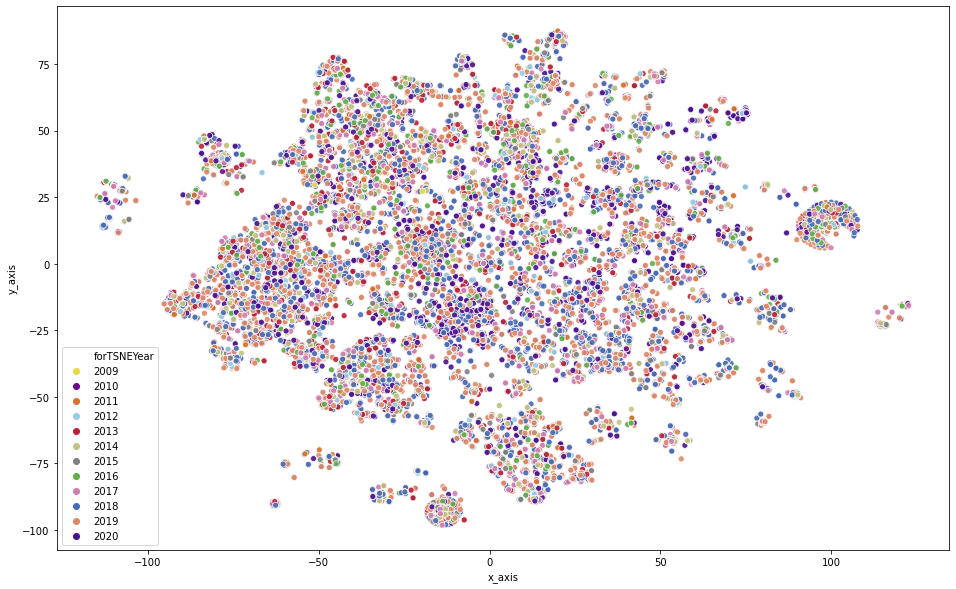

In [57]:
# reviews and forTSNEYear
plt.figure(figsize=(16,10))

colors = ["#ead844", "#6e0a87", "#d9722e", "#97cae4", "#b92138", "#c3c484", "#808281", "#61ae4b", "#cf7eb2", "#476bb5", "#dd8969", "#481191", "#dcab35", "#92008c", "#e6f55e", "#7d1a13", "#93b841", "#6e3715", "#d0322a", "#2b3919"]
colors2 = colors[:df_copy['forTSNEYear'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEYear'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEYear'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

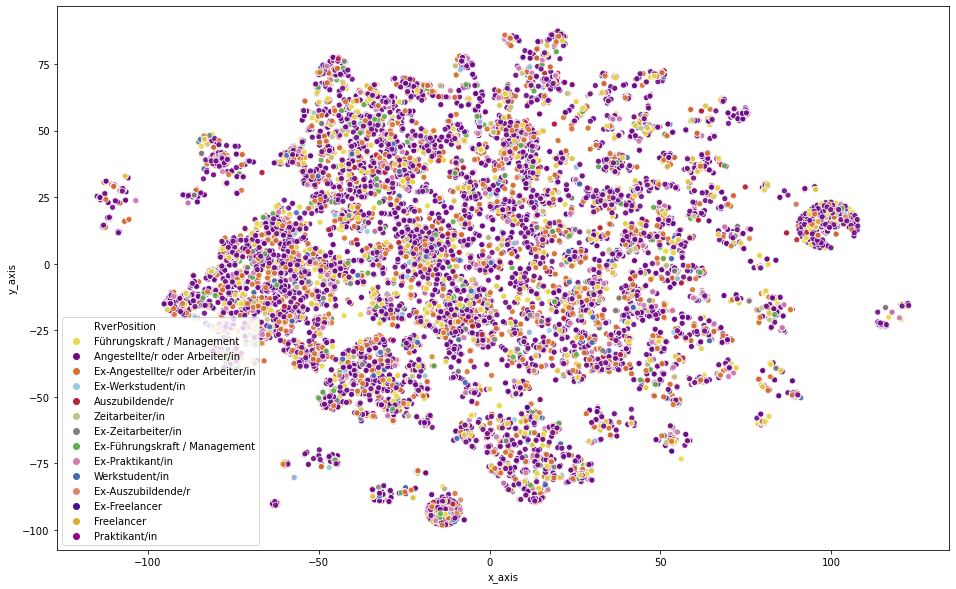

In [58]:
# reviews and RverPosition
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverPosition'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverPosition'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('icefire',df_copy['RverPosition'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

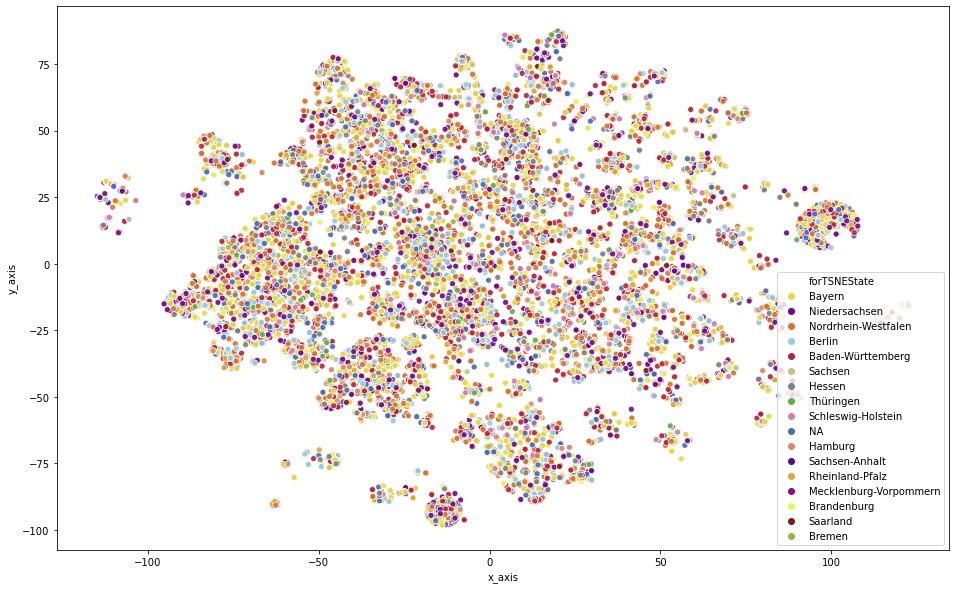

In [59]:
# reviews and forTSNEState
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['forTSNEState'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['forTSNEState'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['forTSNEState'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

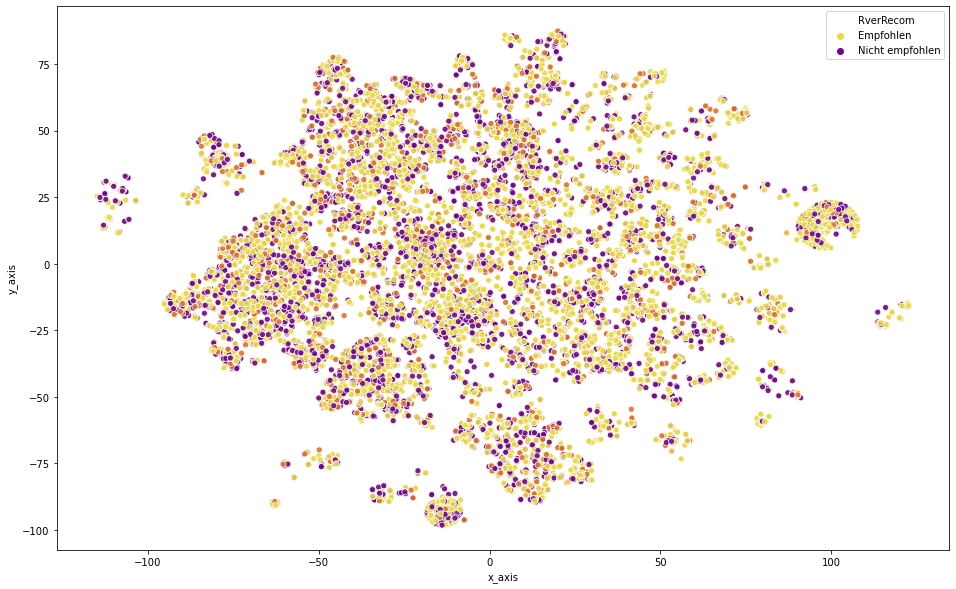

In [60]:
# reviews and RverRecom
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RverRecom'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RverRecom'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RverRecom'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

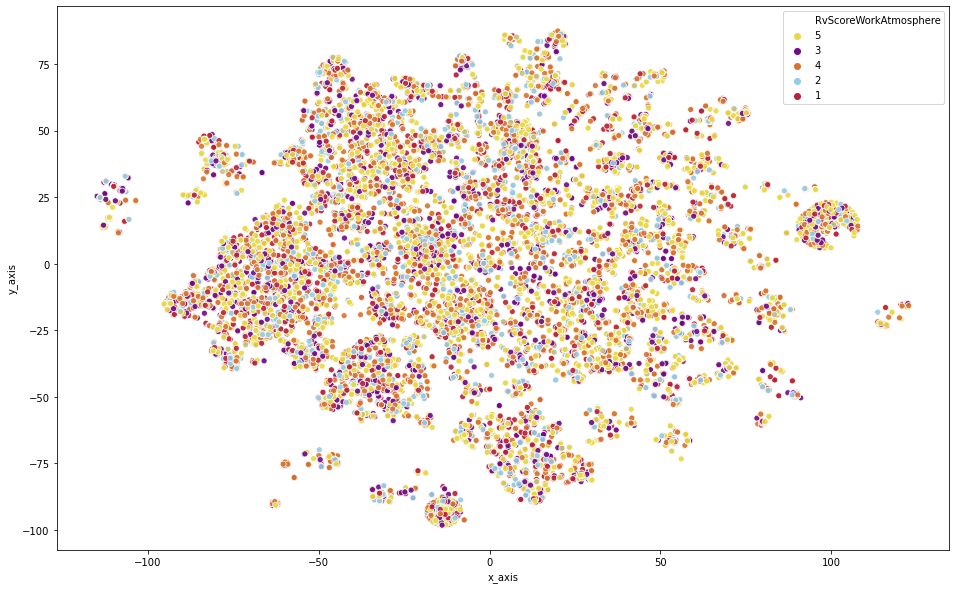

In [61]:
# reviews and RvScoreWorkAtmosphere 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkAtmosphere'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkAtmosphere'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkAtmosphere'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

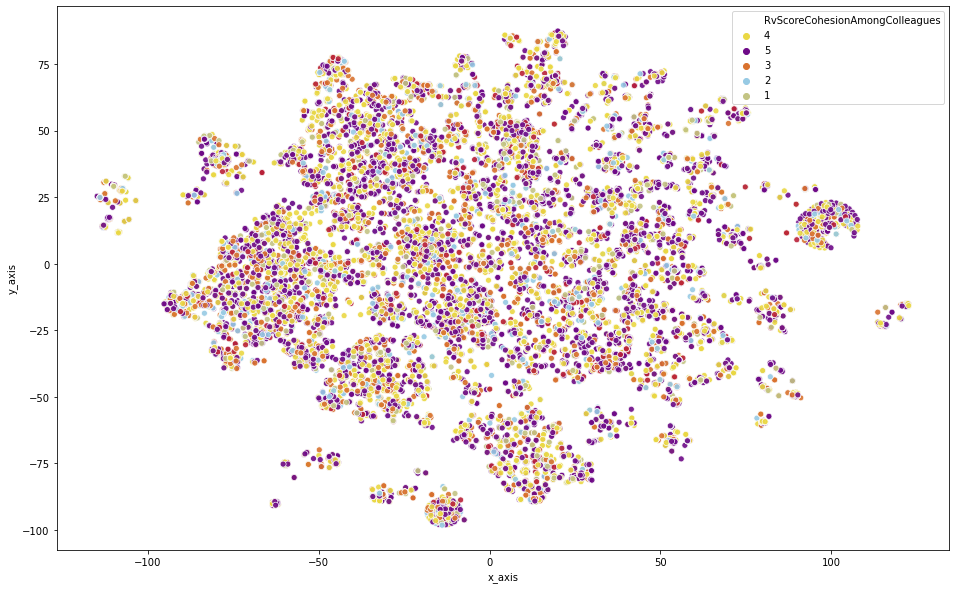

In [62]:
# reviews and RvScoreCohesionAmongColleagues 
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreCohesionAmongColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreCohesionAmongColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreCohesionAmongColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

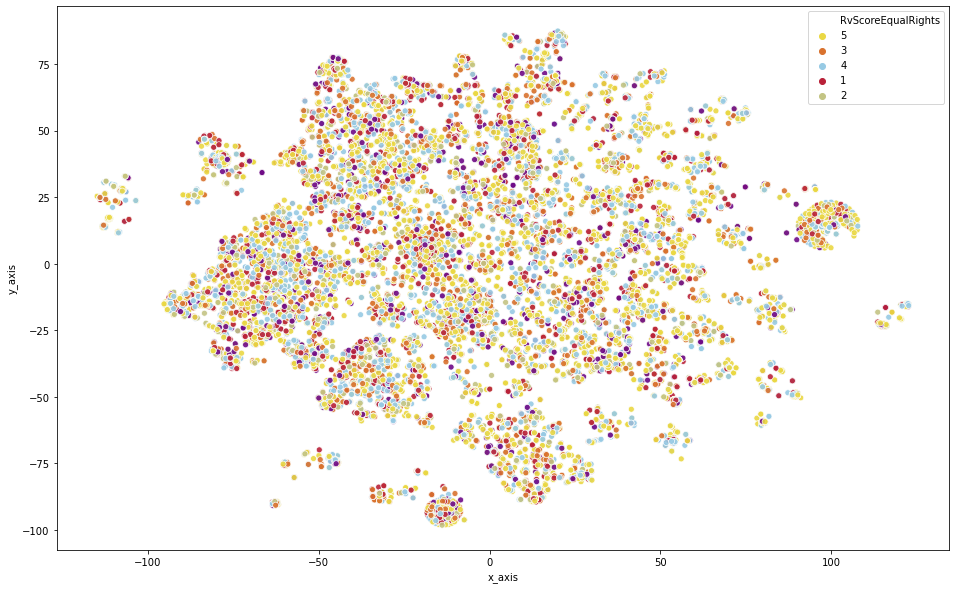

In [63]:
# reviews and RvScoreEqualRights
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEqualRights'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEqualRights'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEqualRights'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

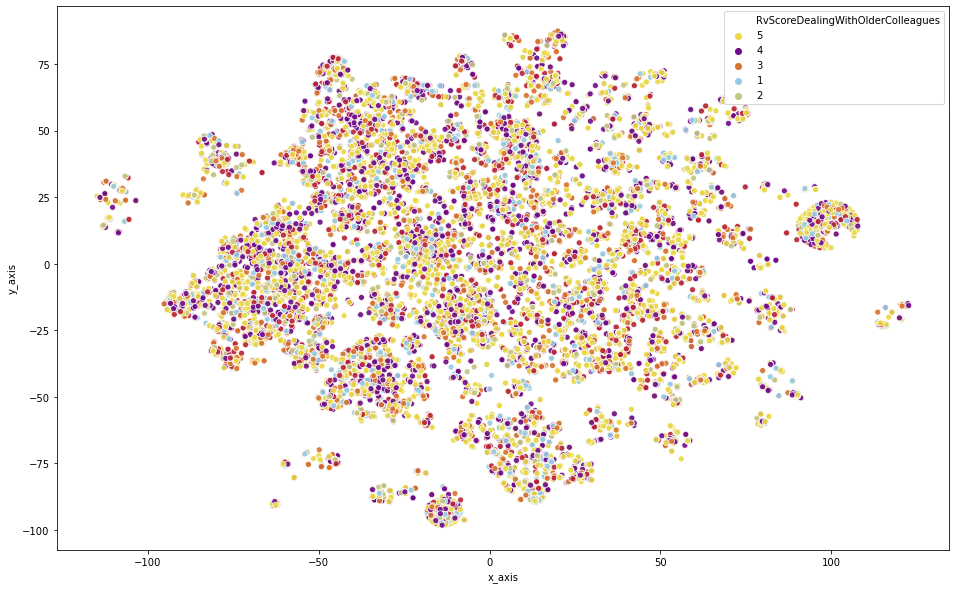

In [64]:
# reviews and RvScoreDealingWithOlderColleagues
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreDealingWithOlderColleagues'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreDealingWithOlderColleagues'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreDealingWithOlderColleagues'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

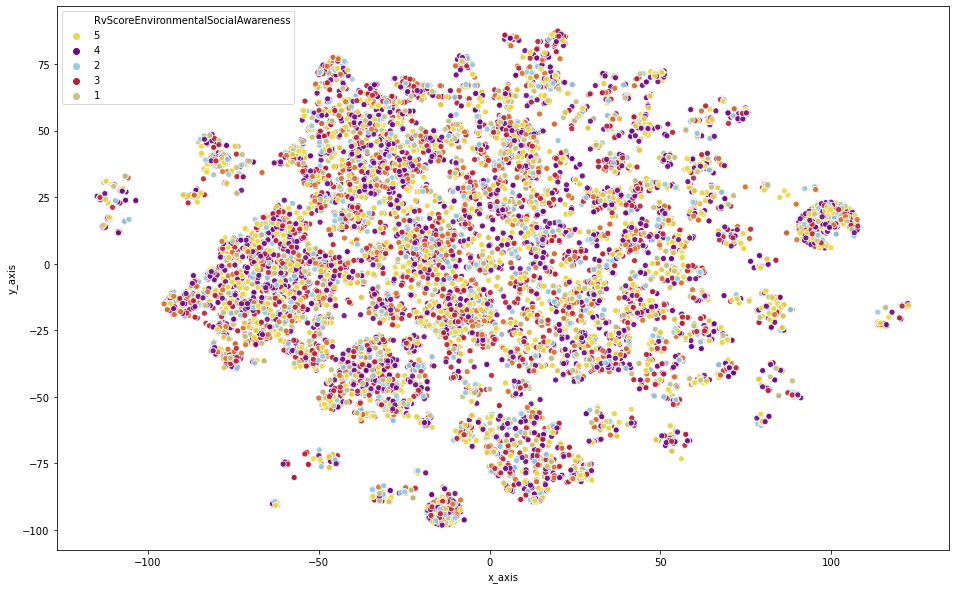

In [65]:
# reviews and RvScoreEnvironmentalSocialAwareness
        
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreEnvironmentalSocialAwareness'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreEnvironmentalSocialAwareness'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreEnvironmentalSocialAwareness'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))

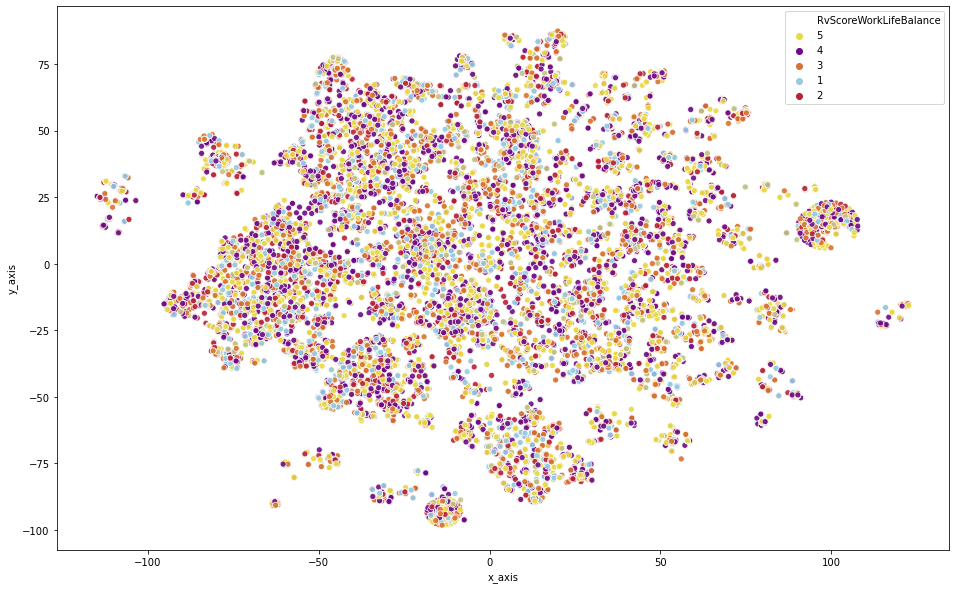

In [66]:
# reviews and RvScoreWorkLifeBalance
plt.figure(figsize=(16,10))
colors2 = colors[:df_copy['RvScoreWorkLifeBalance'].nunique()]

sns.scatterplot(
    x='x_axis', y='y_axis',
    hue=df_copy['RvScoreWorkLifeBalance'],
    data=df_copy[['x_axis','y_axis']],
    legend="full",
    alpha=0.9,
    #palette= sns.color_palette('magma',df_copy['RvScoreWorkLifeBalance'].nunique())
    palette= sns.color_palette(colors2)
    
)
#sns.palplot(sns.color_palette("RdBu", 10))